In [3]:
% load_ext autoreload
% autoreload 2
from algorithms.GMM import GMM
import datetime

start_time = datetime.datetime(2018, 2, 7)
end_time = datetime.datetime(2018, 2, 8)

gmm = GMM(start_time, end_time, 'cvw')
gmm.pickle()
print(gmm.data_dict.keys())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[1 2 3]


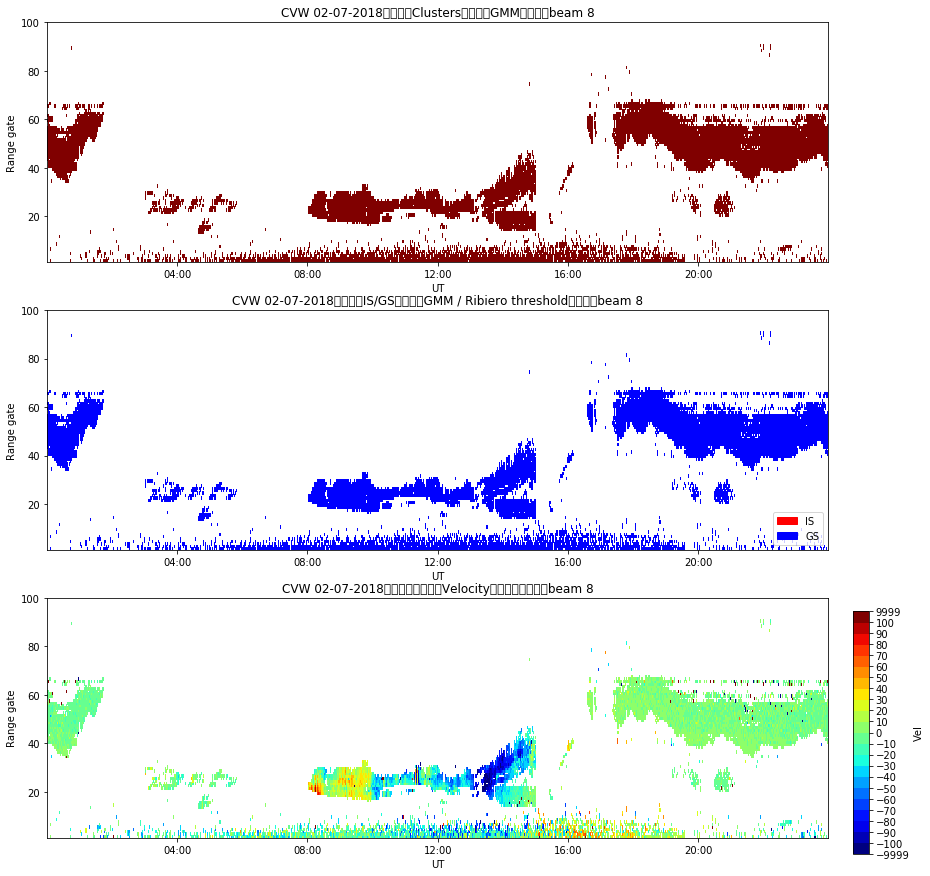

In [5]:
%matplotlib inline
gmm.plot_rti(8, 'Ribiero')

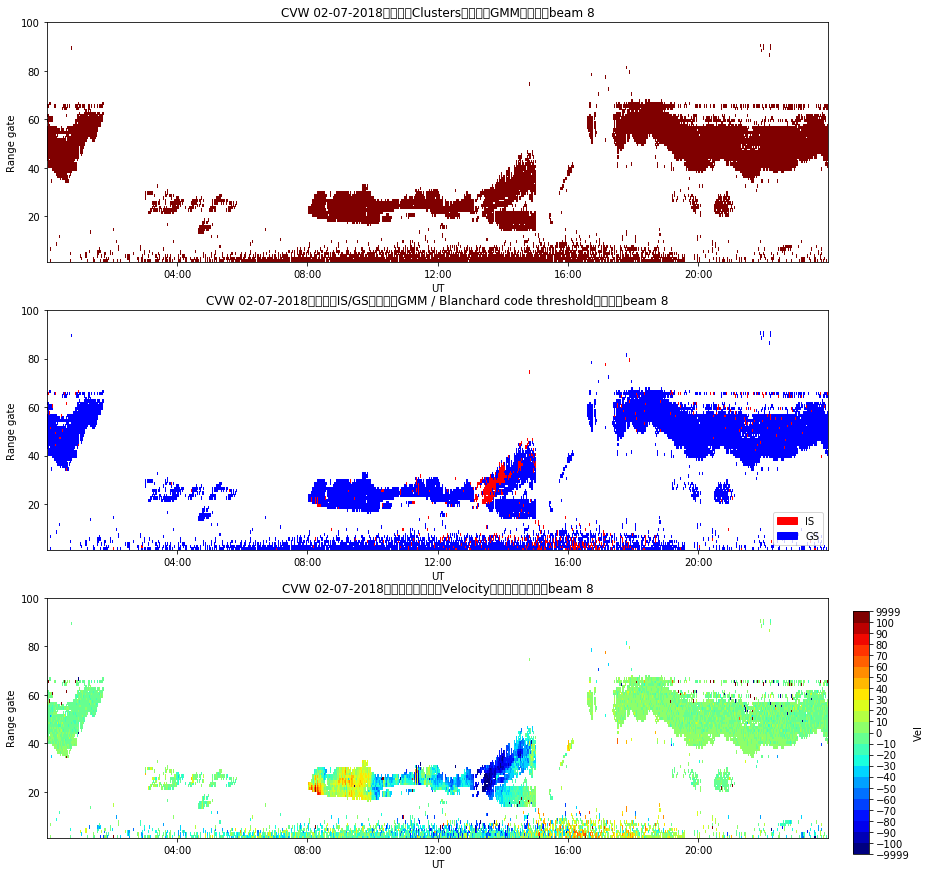

In [6]:
gmm.plot_rti(8, 'Blanchard code')